1000001
500001
[  0.93972005   1.70625564   2.26678193 ... 441.9784262  441.98318702
 441.98751897]
500000
441.9875189653163
1
1000001
500001
[  0.93521752   1.66329286   2.10233756 ... 628.83491582 628.83581385
 628.83646061]
500000
628.8364606122757
2
1000001
500001
[  0.93785989   1.67647423   2.1333781  ... 674.71637063 674.71737711
 674.71870471]
500000
674.718704712939
3
1000001
500001
[   0.93765288    1.68164931    2.16505721 ... -117.30590907 -117.30480357
 -117.30332059]
500000
-117.3033205856849
4
1000001
500001
[   0.93602905    1.6657088     2.10657616 ... -110.01381647 -110.00707358
 -109.99986154]
500000
-109.99986154377399
5
1000001
500001
[  0.93685546   1.67583692   2.1480366  ... 182.15375248 182.14992879
 182.1462075 ]
500000
182.14620749806178
6
1000001
500001
[  0.93593262   1.66824359   2.11829805 ... 331.77651761 331.77778013
 331.77905721]
500000
331.7790572139495
7
1000001
500001
[ 0.93750735  1.68194077  2.1709424  ... 92.03083303 92.03287658
 92.03472043]
50

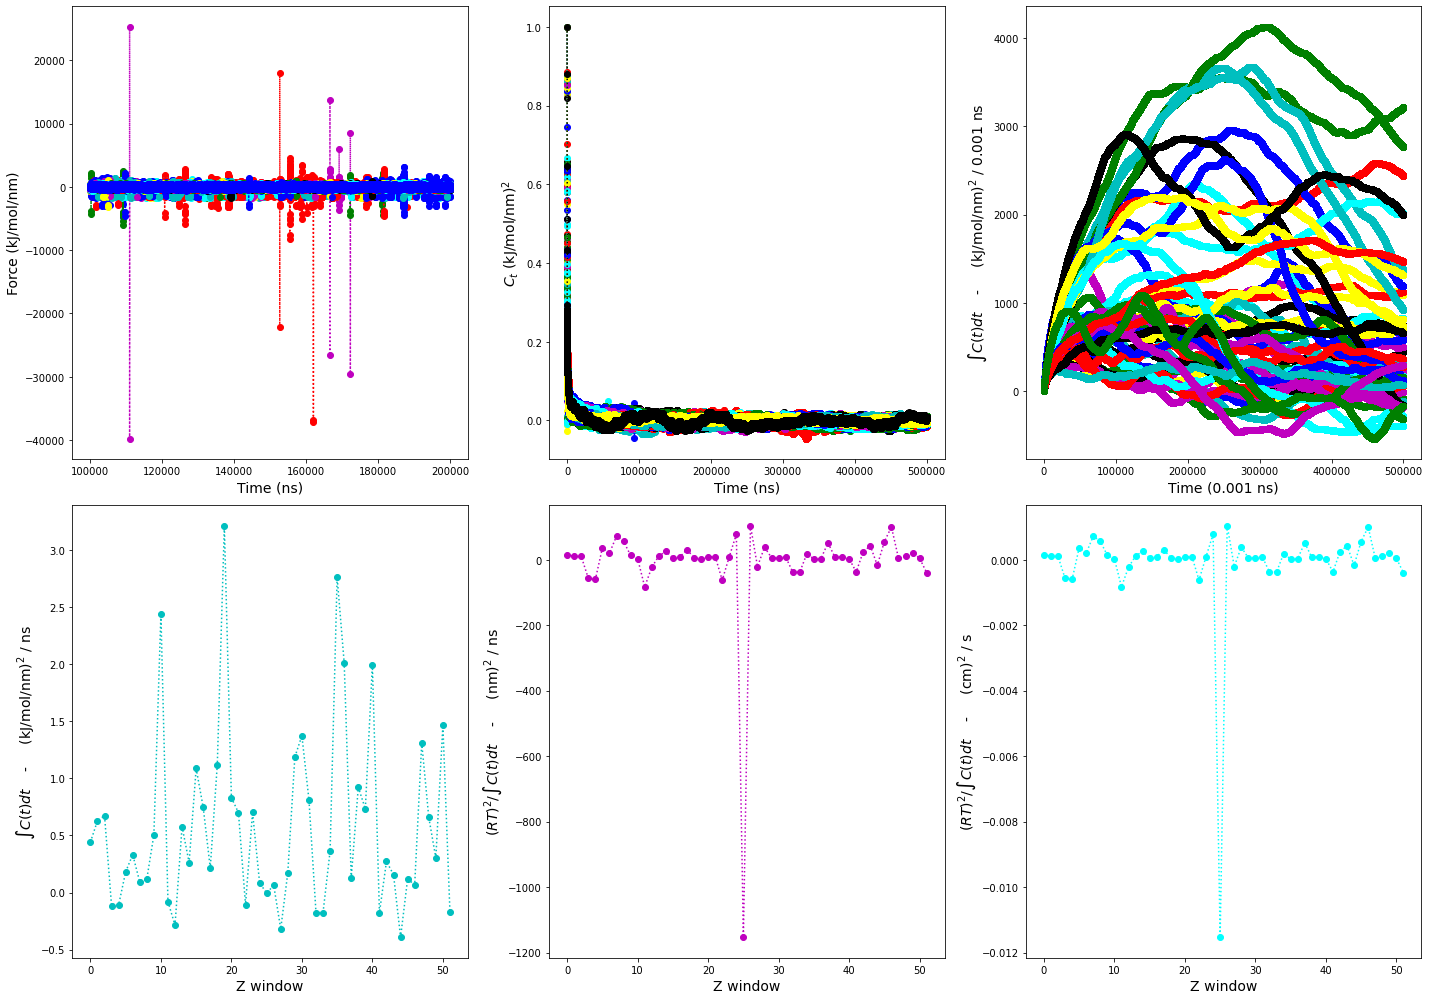

In [1]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq_0.2/Force_prod/All_new/')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            plt.ylim(-300, 300)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=500000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            np.savetxt("dz_integrat.txt", acf_int, delimiter=" ", fmt="%s")


            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.0001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()



In [ ]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq_0.2/Force_prod/All_new/')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            plt.ylim(-300, 300)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=1000000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            np.savetxt("dz_integrat.txt", acf_int, delimiter=" ", fmt="%s")


            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=18)
plt.xlabel('Z window',fontsize=18)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=18)
plt.xlabel('Z window',fontsize=18)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=18)
plt.xlabel('Z window',fontsize=18)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()


1000001
500001
[ 0.90291575  1.50364576  1.71425185 ... 41.56610225 41.56475824
 41.5635209 ]
500000
41.563520897415266
1
1000001
500001
[  0.90378021   1.51107425   1.74152644 ... 270.46145176 270.46077785
 270.46044784]
500000
270.460447836628
2
1000001
500001
[  0.90329622   1.50857343   1.73247417 ... 358.43224261 358.43230522
 358.43237603]
500000
358.4323760308852
3
1000001
500001
[  0.90249867   1.50585504   1.73259214 ... 534.73806425 534.74085751
 534.74392788]
500000
534.7439278773554
4
1000001
500001
[  0.90600582   1.53572145   1.83493876 ... 266.2937994  266.29482517
 266.2959592 ]
500000
266.29595919751387
5
1000001
500001
[ 0.90155388  1.52015065  1.81355731 ... 24.6140312  24.61703901
 24.62028599]
500000
24.620285993602664
6
1000001
500001
[9.06997573e-01 1.57561713e+00 2.03006362e+00 ... 1.74314432e+03
 1.74315230e+03 1.74315983e+03]
500000
1743.1598257328817
7
1000001
500001
[  0.90863586   1.55887913   1.91672327 ... 107.50508279 107.50413252
 107.50400316]
500000
1

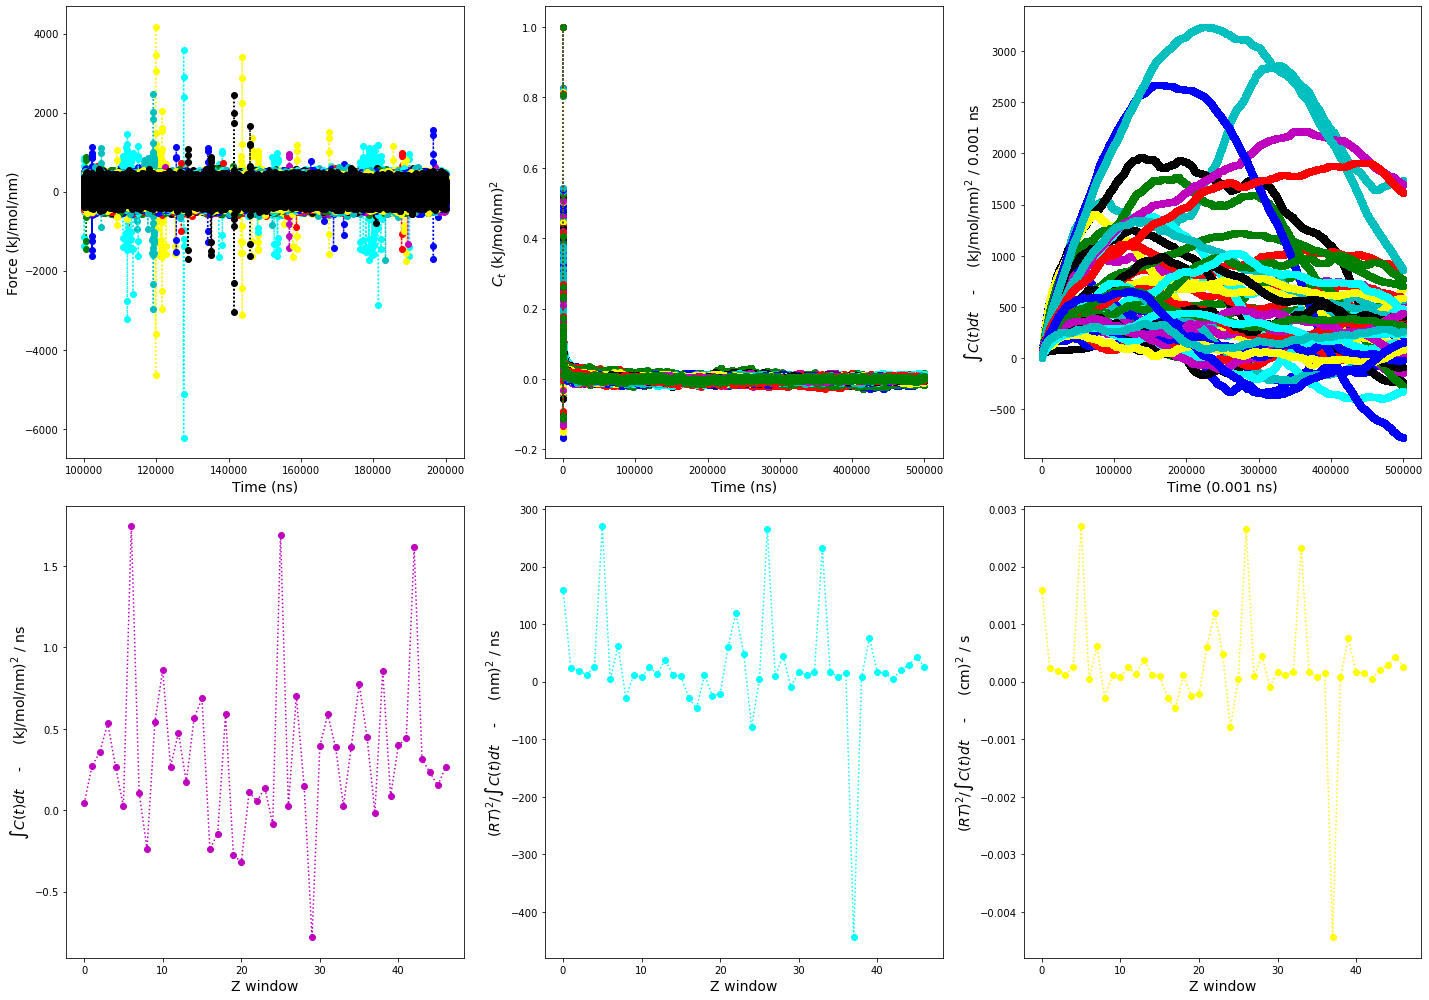

In [2]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_2MR_5000eq_0.2/Force_prod/All_new/')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=500000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()



1000001
500001
[   0.93517573    1.68489559    2.21402153 ... -145.78288287 -145.78156334
 -145.77988302]
500000
-145.77988301714961
1
1000001
500001
[ 0.93457334  1.67808332  2.18741418 ... 55.92339045 55.92592582
 55.92870054]
500000
55.92870053876296
2
1000001
500001
[9.35269582e-01 1.67852746e+00 2.18355779e+00 ... 2.92293362e+03
 2.92293054e+03 2.92292742e+03]
500000
2922.927418169393
3
1000001
500001
[9.33969632e-01 1.66764894e+00 2.14445101e+00 ... 1.08150623e+03
 1.08150693e+03 1.08150728e+03]
500000
1081.5072824485185
4
1000001
500001
[9.33746360e-01 1.66501853e+00 2.13319190e+00 ... 2.27331365e+03
 2.27330104e+03 2.27328878e+03]
500000
2273.288778068673
5
1000001
500001
[  0.93474794   1.66849458   2.13659349 ... 386.94438327 386.93986185
 386.93532074]
500000
386.93532073689113
6
1000001
500001
[9.35415563e-01 1.67502566e+00 2.16343892e+00 ... 2.15179380e+03
 2.15178084e+03 2.15176738e+03]
500000
2151.7673824678054
7
1000001
500001
[  0.93387169   1.65396614   2.07192676 ...

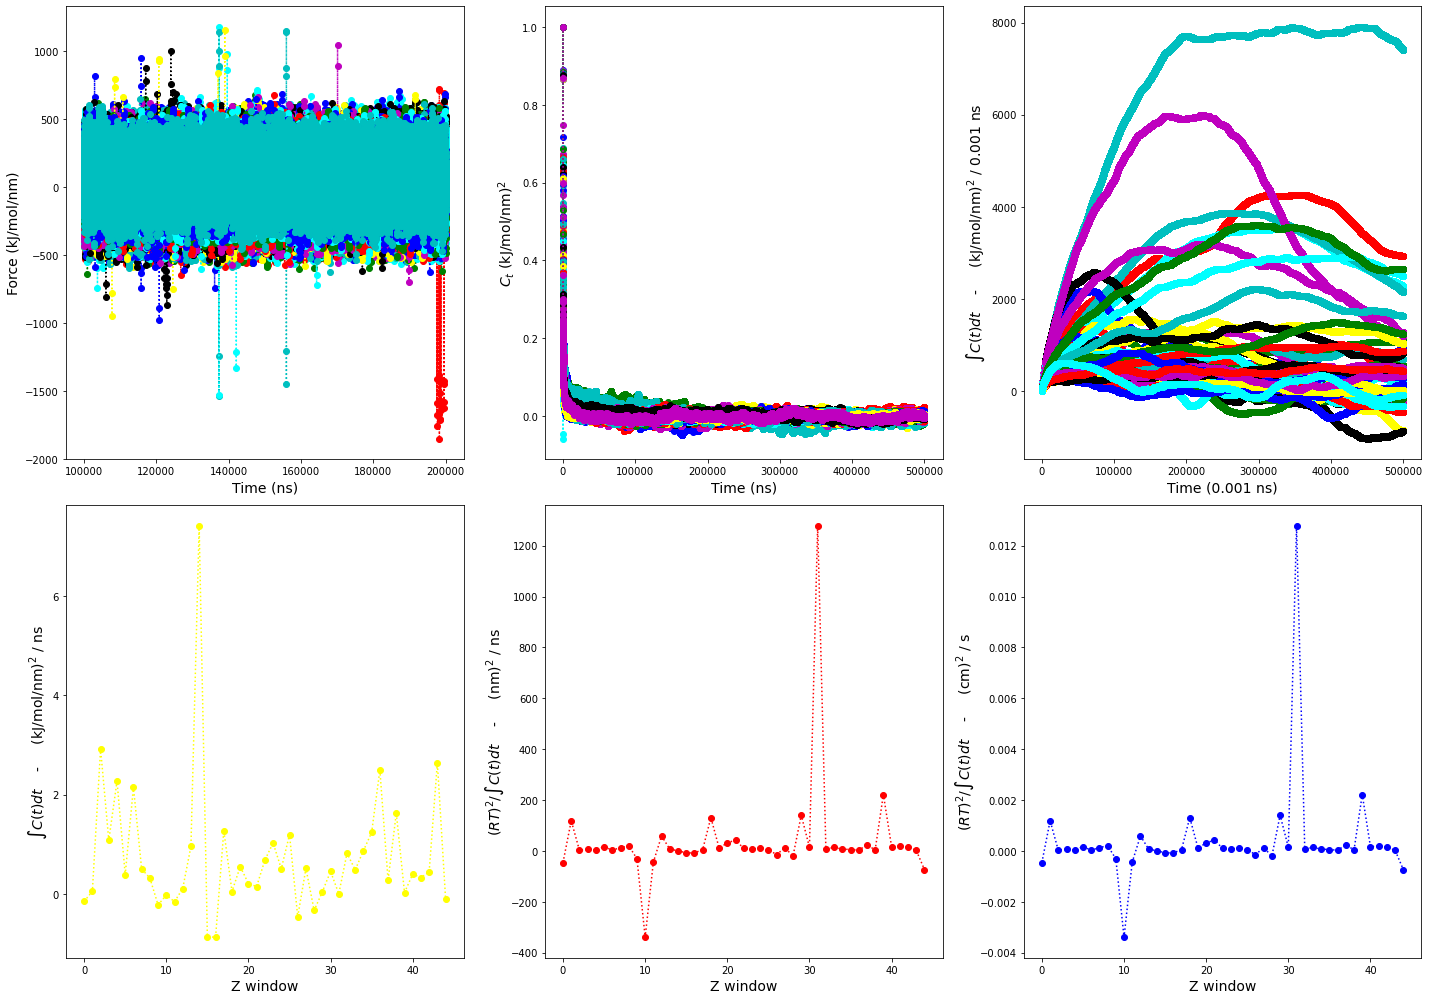

In [3]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test4')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=500000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()


In [ ]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_DPG_5000eq_0.2/All_new_')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            #plt.xlim(0, 100)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=1000000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=18)
            plt.xlabel('Time (ns)',fontsize=18)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=18)

            plt.xlabel('Time (0.001 ns)',fontsize=18)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=18)
plt.xlabel('Z window',fontsize=18)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=18)
plt.xlabel('Z window',fontsize=18)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=18)
plt.xlabel('Z window',fontsize=18)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()

In [ ]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Naphtha_5000eq_0.2/Force_prod/All_new2')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)

         
           
            X=f[1000000:,0]
            Y=f[1000000:,1]
            
            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100)
            
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=500000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            #plt.xlim(0, 100000)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)

plt.subplot(2, 3, 5)
plt.plot(fraction,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 100)

plt.subplot(2, 3, 6)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()

1000001
500001
[  0.90823032   1.55189233   1.89233768 ... 229.58384005 229.58194625
 229.5801294 ]
500000
229.58012939581783
1
1000001
500001
[ 0.905238    1.51608476  1.74639494 ... 74.739698   74.73805431
 74.73668593]
500000
74.73668593489055
2
1000001
500001
[  0.90432489   1.51006373   1.72834087 ... 148.63881296 148.64017942
 148.64059024]
500000
148.64059024007767
3
1000001
500001
[ 0.90534197  1.51816959  1.75648073 ... 27.62757927 27.62907953
 27.62973248]
500000
27.629732476459797
4
1000001
500001
[  0.90542573   1.51631919   1.74558969 ... 241.80347331 241.8039231
 241.80396789]
500000
241.80396789343195
5
1000001
500001
[  0.90368015   1.49738046   1.6678125  ... -39.71408742 -39.71027978
 -39.70729338]
500000
-39.707293383231715
6
1000001
500001
[ 0.90543296  1.51435898  1.73549931 ... 22.74126854 22.74003698
 22.73886672]
500000
22.73886672143246
7
1000001
500001
[  0.90654462   1.52334873   1.7670307  ... -40.1552004  -40.15654875
 -40.15702019]
500000
-40.1570201941470

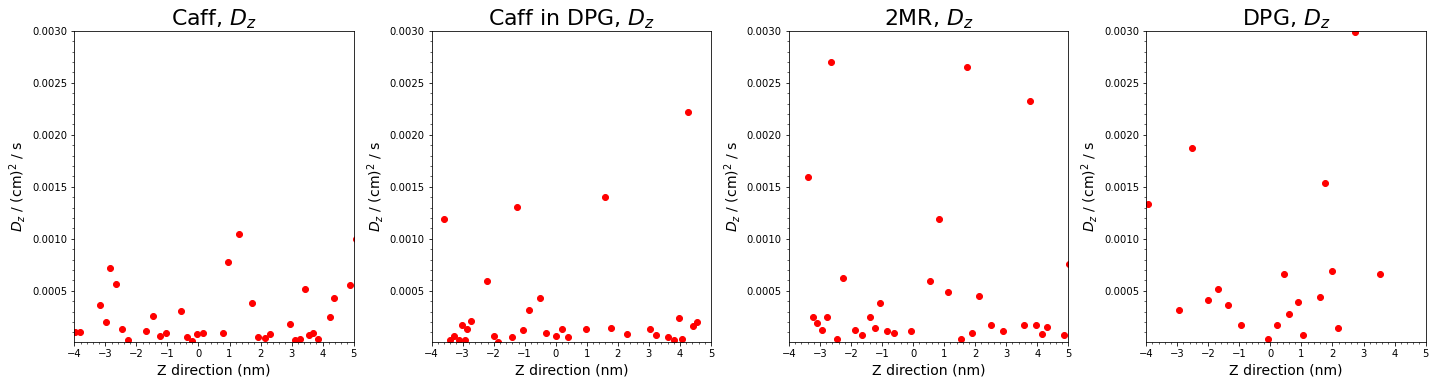

In [8]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,11))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq_0.2/Force_prod/All_new')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 4, 1)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.000009, 0.003)
            plt.xlim(-4, 5)

            plt.ticklabel_format(axis='y', style='sci')
            plt.title('Caff, $D_{z}$',fontsize=22)

            plt.minorticks_on()
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_2MR_5000eq_0.2/Force_prod/All_new')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 4, 3)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('2MR, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ticklabel_format(axis='y', style='sci')
            plt.ylim(0.000009, 0.003)
            plt.xlim(-4, 5)

            plt.minorticks_on()

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
            
            
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test4')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 4, 2)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Caff in DPG, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.000009, 0.003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_DPG_5000eq_0.2/All_new')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 4, 4)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('DPG, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.000009, 0.003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/GreenKubo_LPP_New.png',dpi=300,bbox_inches='tight',pad_inches=0.40)
plt.show()

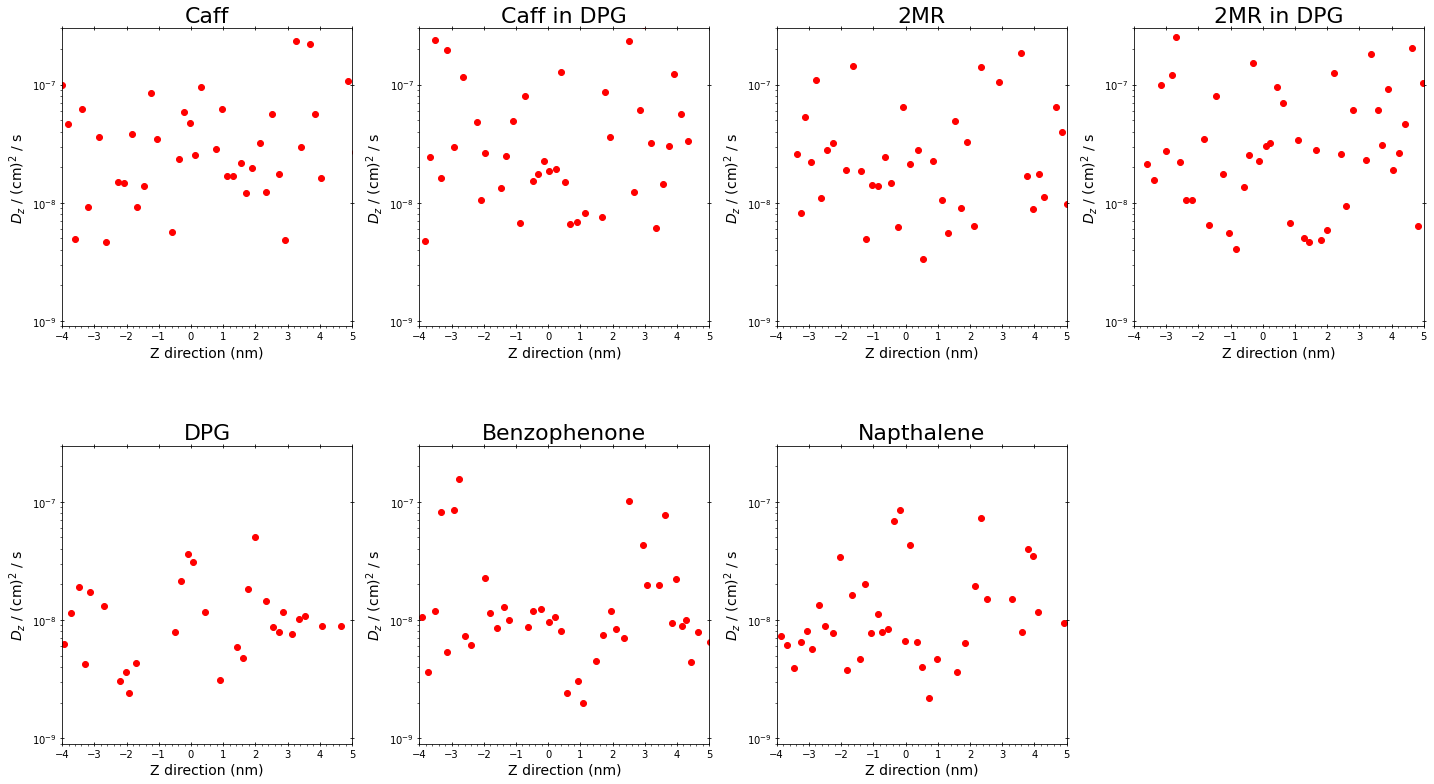

In [3]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,11))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__caff.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 1)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)

            plt.ticklabel_format(axis='y', style='sci')
            plt.title('Caff',fontsize=22)

            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__2mr.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 3)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('2MR',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ticklabel_format(axis='y', style='sci')
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)

            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
            
            
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__caff_dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 2)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Caff in DPG',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__2mr_dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 4)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('2MR in DPG',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 5)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('DPG',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__benzo.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 6)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Benzophenone',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
                
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__naptha.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 7)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Napthalene',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.0000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/GreenKubo_LPP_New.png',dpi=300,bbox_inches='tight',pad_inches=0.40)
plt.show()

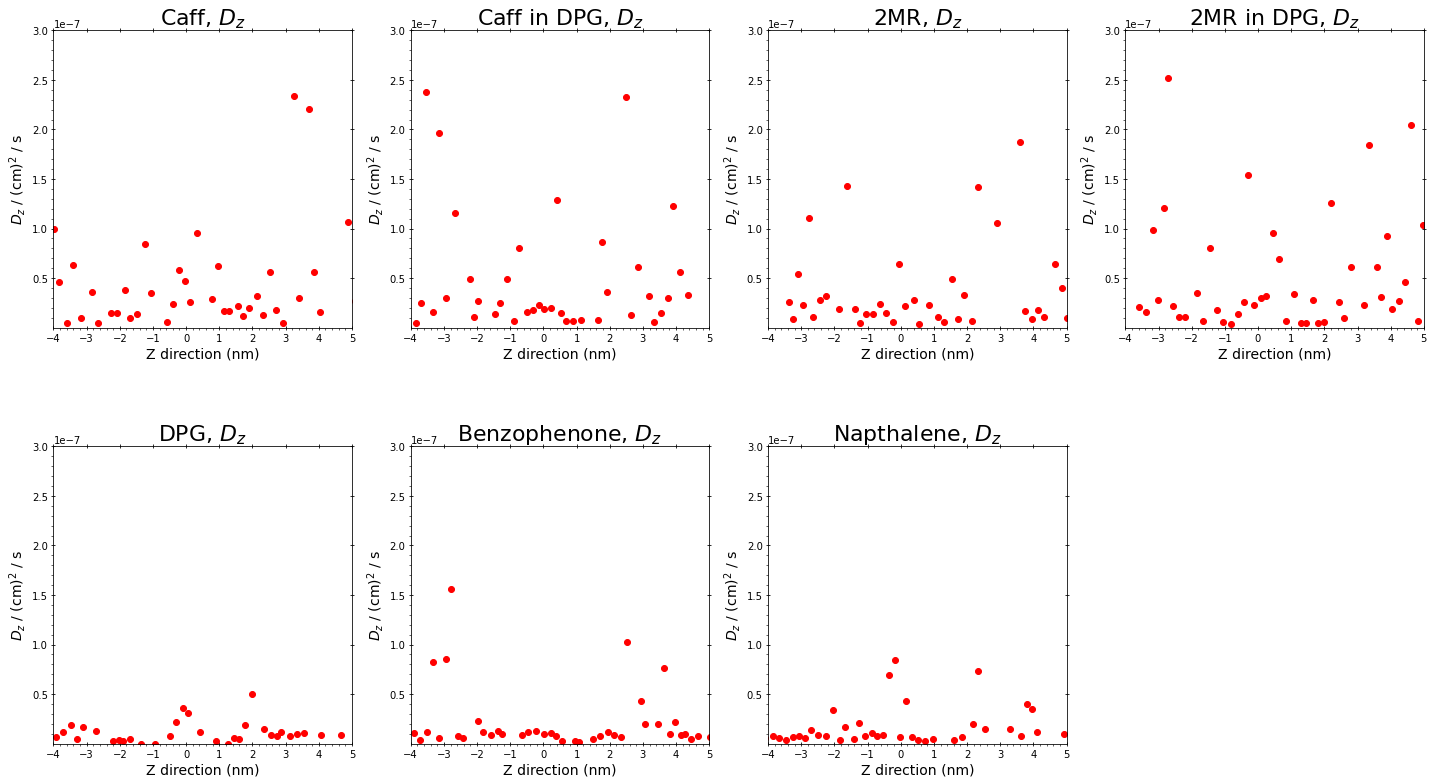

In [2]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,11))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__caff.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 1)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)

            plt.ticklabel_format(axis='y', style='sci')
            plt.title('Caff, $D_{z}$',fontsize=22)

            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__2mr.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 3)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('2MR, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ticklabel_format(axis='y', style='sci')
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)

            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
            
            
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__caff_dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 2)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Caff in DPG, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__2mr_dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 4)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('2MR in DPG, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__dpg.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 5)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('DPG, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__benzo.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 6)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Benzophenone, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
                
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/PMF/PMF_Diffusivity_correction')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz__naptha.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=abs(f[:,1])
            
            plt.subplot(2, 4, 7)

            plt.plot(X, Y,'o',label=name,color=next(colors))
            plt.title('Napthalene, $D_{z}$',fontsize=22)

            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.00000000009, 0.0000003)
            plt.xlim(-4, 5)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            plt.yscale("log")
            plt.tick_params(direction='inout', top=True, right=True, labeltop=False, labelright=False)
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/GreenKubo_LPP_New.png',dpi=300,bbox_inches='tight',pad_inches=0.40)
plt.show()

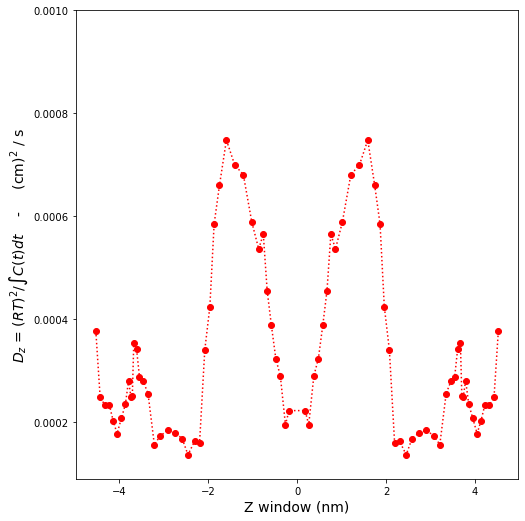

In [9]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_3wat/Pull_2mr_xv/2MR_1_spring_0.1/Production_100ns/All_test/Convergence/test4')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ = $(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.ylim(0.00009, 0.001)
            plt.ticklabel_format(axis='y', style='sci')
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()

In [ ]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test3')
with open('data.txt', 'w') as file:
    
    
    def moving_average(a, n=50000) :
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n


    count=0
    path = './*pullx.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
for name in sorted(glob.glob('prod_z_*_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            scale_factor = 1

            X=f[:,0]/1000
            a=f[:,1]
            
            X_=moving_average(X)
            Y_=moving_average(a)
            
            plt.subplot(2, 3, 1)
            plt.plot(X_,Y_,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            plt.ylim(-150, 150)
            #plt.legend(loc='best')
            plt.minorticks_on()

            plt.title('LPP: Pulling')
            count +=1
        
          
            X_scale = np.linspace(0, 50, 500001)
            X_scale_ = np.linspace(0, 50, 500000)

            print(len(X_))

            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y_,  nlags=500000)
            #acf_ = sm.tsa.acf(Y_)
            print(len(acf_))
  
            
            plt.plot(X_scale, acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(X_scale_, acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)



plt.subplot(2, 3, 5)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$D_{z}$ = $(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window (nm)',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

            
            

                
 
plt.subplots_adjust(hspace=0.4)

#plt.savefig('

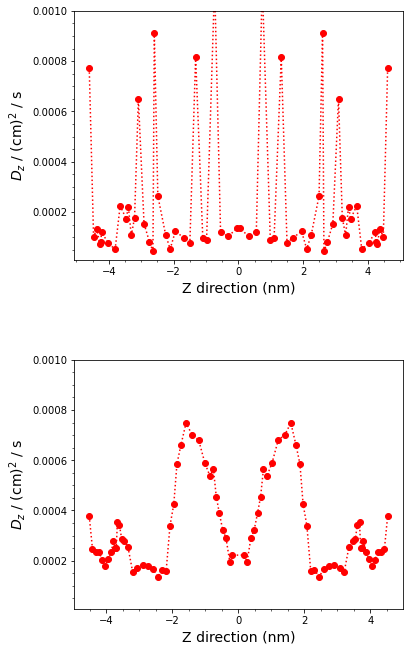

In [9]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,11))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_3wat/Pull_caff_xv/Caff_1_spring/Production_long_100ns/All/Convergence_new/MSD_Caff')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ylim(0.000009, 0.001)
            plt.ticklabel_format(axis='y', style='sci')
            plt.minorticks_on()
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_3wat/Pull_2mr_xv/2MR_1_spring_0.1/Production_100ns/All_test/Convergence/test4')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 4)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ / (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z direction (nm)',fontsize=14)
            plt.ticklabel_format(axis='y', style='sci')
            plt.ylim(0.000009, 0.001)
            plt.minorticks_on()

            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
            
            
#plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_3wat/AutoCorr_asym.png',dpi=300,bbox_inches='tight',pad_inches=0.40)
plt.show()

500001
50001
[9.87700470e-01 1.93800652e+00 2.83780454e+00 ... 2.25711897e+03
 2.25711365e+03 2.25710817e+03]
50000
2257.108173153337
1
500001
50001
[9.88018554e-01 1.93626789e+00 2.82365433e+00 ... 2.70669383e+03
 2.70668592e+03 2.70667818e+03]
50000
2706.6781775494032
2
500001
50001
[9.86856800e-01 1.93139336e+00 2.81439710e+00 ... 1.34716799e+03
 1.34717273e+03 1.34717740e+03]
50000
1347.177400463701
3
500001
50001
[9.88487322e-01 1.93903347e+00 2.83112687e+00 ... 4.32195132e+03
 4.32199735e+03 4.32204376e+03]
50000
4322.04376034622
4
500001
50001
[9.87829934e-01 1.93667321e+00 2.82980163e+00 ... 2.54602678e+03
 2.54607312e+03 2.54611953e+03]
50000
2546.119527955992
5
500001
50001
[  0.98804893   1.93499842   2.81575969 ... 685.99477105 685.95376971
 685.91268081]
50000
685.9126808092107
6
500001
50001
[9.88862008e-01 1.94131118e+00 2.83996359e+00 ... 7.46584296e+03
 7.46595714e+03 7.46607125e+03]
50000
7466.071245869899
7
500001
50001
[9.87339801e-01 1.93381837e+00 2.82045923e+00 .

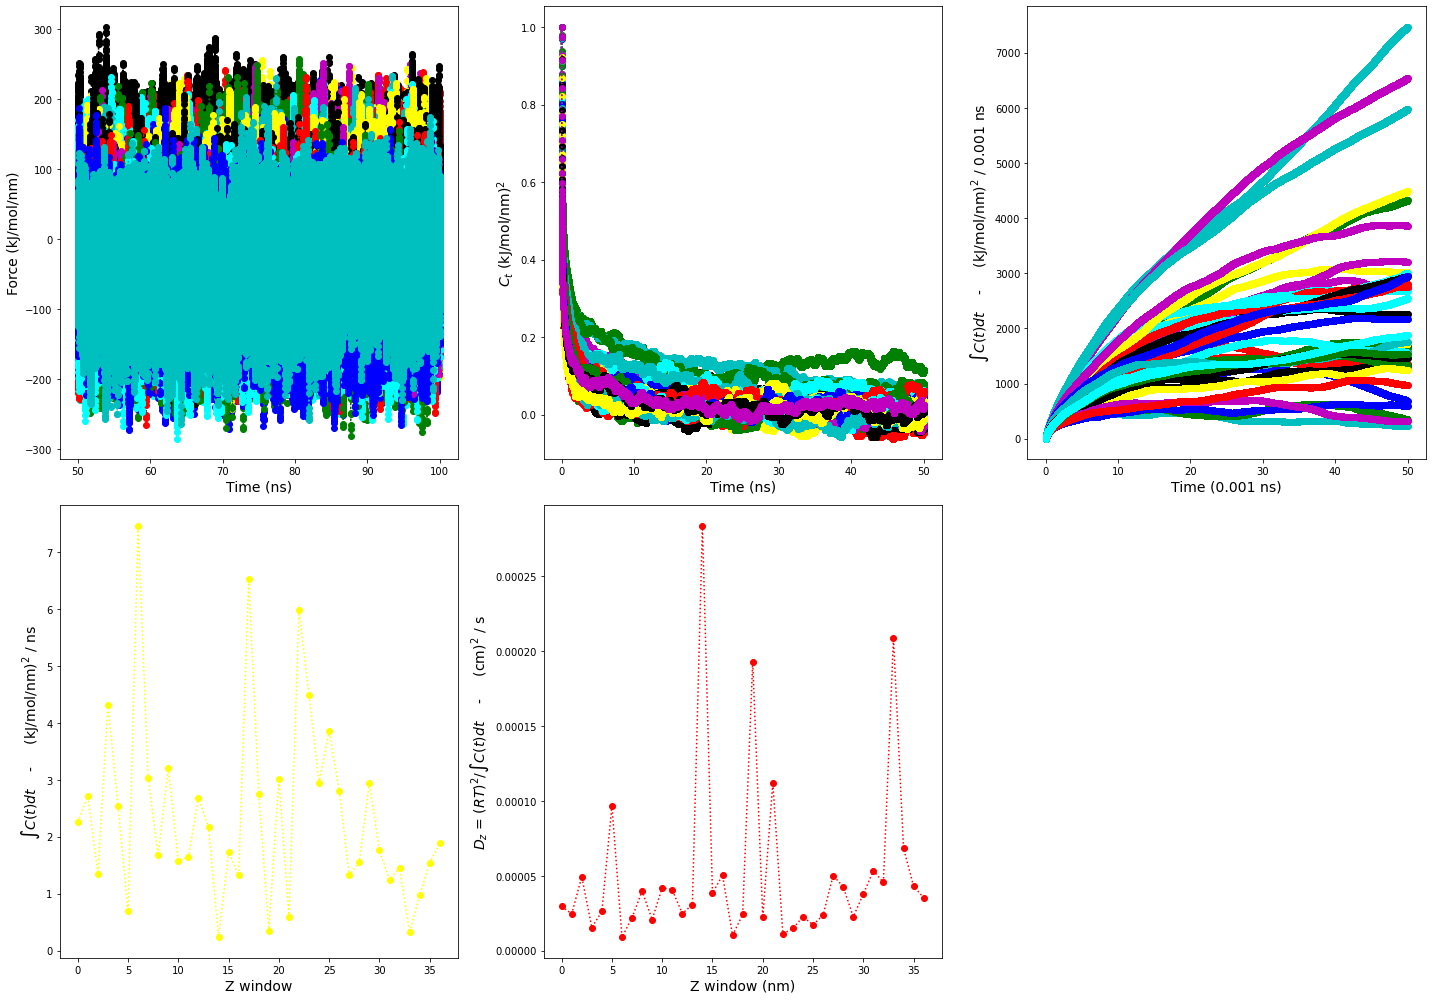

In [3]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools

last = []
dz = []
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All/MSD')
with open('data.txt', 'w') as file:
    
    path = './all.txt' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('*_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            scale_factor = 1
            X=f[500000:,0]/1000
            Y=f[500000:,1]
            X_scale = np.linspace(0, 50, 50001)
            X_scale_ = np.linspace(0, 50, 50000)

            print(len(X))
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)
  
            
            plt.subplot(2, 3, 2)

            acf_ = sm.tsa.acf(Y,  nlags=50000)
            #print(len(acf))
            #print(len(X))
            
            print(len(acf_))
            plt.plot(X_scale, acf_,':ro',label=name,color=next(colors))
            plt.ylabel('$C_{t}$ (kJ/mol/nm)$^2$',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)

 
            plt.subplot(2, 3, 3)

            acf_int = integrate.cumtrapz(acf_)
            #print(acf_int)
            plt.plot(X_scale_, acf_int,':ro',label=name,color=next(colors))
            plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / 0.001 ns',fontsize=14)

            plt.xlabel('Time (0.001 ns)',fontsize=14)
            
            xmin, xmax = plt.xlim()
            plt.xlim(xmin * scale_factor, xmax * scale_factor)
            
            print(acf_int)
            print(len(acf_int))
            last_element = acf_int[len(acf_int) - 1]
            print(last_element)
            last.append(last_element)
            print(len(last))
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

# Display the autocorrelation plot of your time series

print(len(last))

last_arr = np.array(last)
last_ = last_arr*0.001

print(len(last_))
rt = 0.008314*310   #kJ/mol
rt2_ = rt*rt

invert_last = 1. / last_
print(len(invert_last))
print(invert_last)
#invert_last = np.reciprocal(last_)
fraction = rt2_*invert_last
fraction_units = fraction*0.00001

plt.subplot(2, 3, 4)
plt.plot(last_,':ro',label=name,color=next(colors))
plt.ylabel(r'$\int C(t) dt $    -     (kJ/mol/nm)$^2$ / ns',fontsize=14)
plt.xlabel('Z window',fontsize=14)
#plt.xlim(0, 50000)
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)


plt.subplot(2, 3, 5)

plt.plot(fraction_units,':ro',label=name,color=next(colors))
plt.ylabel('$D_{z}$ = $(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
plt.xlabel('Z window (nm)',fontsize=14)
np.savetxt("last_element_.txt", last, delimiter=" ", fmt="%s")
plt.ticklabel_format(useOffset=False)

np.savetxt("dz.txt", fraction_units, delimiter=" ", fmt="%s")

            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)

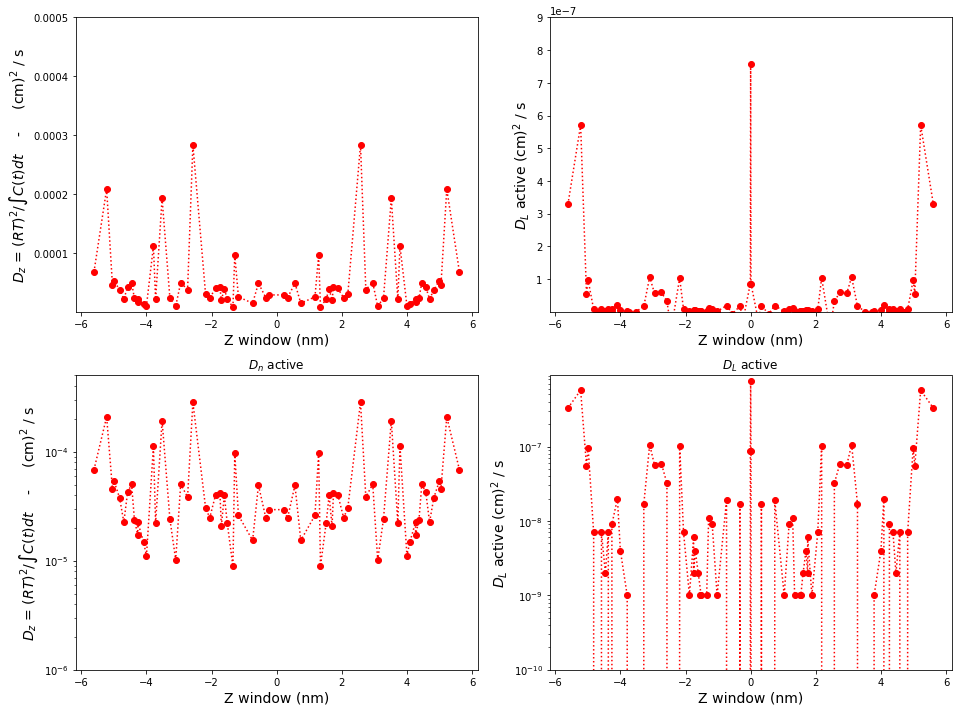

In [22]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,10))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All/MSD')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ = $(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.ylim(0.000001, 0.0005)
            plt.ticklabel_format(axis='y', style='sci')
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 



os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/NEW_DOUBLE_SAND/Analyse_Sandwich/LatDif_Active/Caff_310')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dl_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 2)

            plt.plot(X, Y, ':ro',label=name,color=next(colors))
            plt.ylabel('$D_{L}$ active (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            
            plt.ylim(0.0000000001, 0.0000009)
             
            #plt.yscale("log")
            plt.ticklabel_format(axis='y', style='sci')

             
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All/MSD')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 4)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{z}$ = $(RT)^{2} / \int C(t) dt $    -     (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.title('$D_{n}$ active ')

            plt.ylim(0.000001, 0.0005)
            #plt.ticklabel_format(axis='y', style='sci')
            plt.yscale("log")
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 



os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/NEW_DOUBLE_SAND/Analyse_Sandwich/LatDif_Active/Caff_310')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dl_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            positives = [x for x in Y if x >= 0]

            plt.subplot(2, 3, 5)

            plt.plot(X, Y, ':ro',label=name,color=next(colors))
            plt.ylabel('$D_{L}$ active (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.title('$D_{L}$ active ')

            
            plt.ylim(0.0000000001, 0.0000009)
             
            plt.yscale("log")
            #plt.ticklabel_format(axis='y', style='sci')

             
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
               
            

            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()

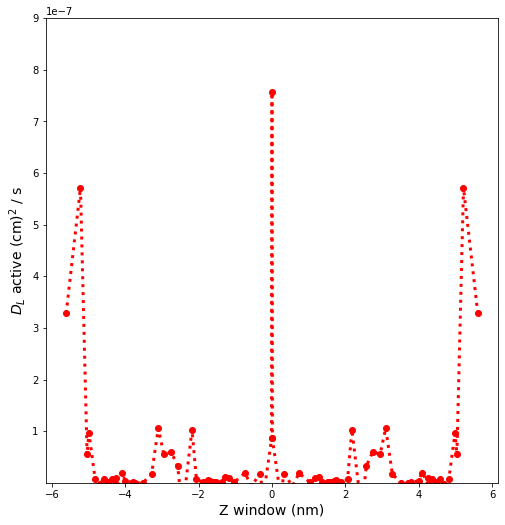

In [3]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(20,14))

import itertools


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/NEW_DOUBLE_SAND/Analyse_Sandwich/LatDif_Active/Caff_310')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)

            plt.plot(X, Y, ':ro', linewidth=3,label=name,color=next(colors))
            plt.ylabel('$D_{L}$ active (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            
            plt.ylim(0.0000000001, 0.0000009)
             
            #plt.yscale("log")
            plt.ticklabel_format(axis='y', style='sci')

             
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
            
            
plt.tight_layout()
#plt.savefig('AutoCorr.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()
 

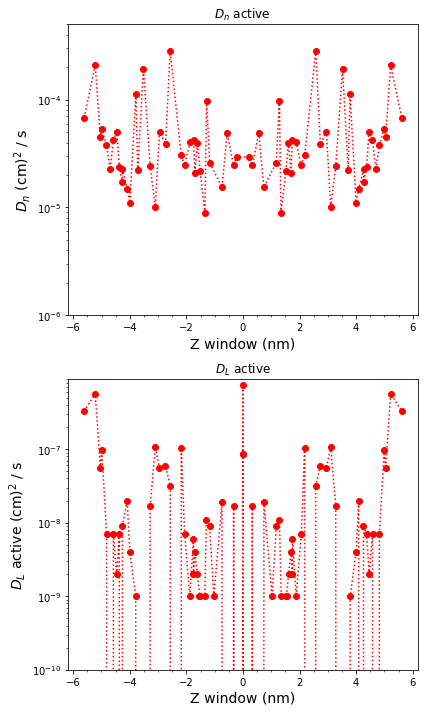

In [2]:
#Auto-correlation
from statsmodels.graphics import tsaplots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno
import statsmodels.api as sm
import scipy.integrate as scint
from scipy import integrate


plt.figure(figsize=(16,10))

import itertools



os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All/MSD')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dz_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('$D_{n}$ (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.title('$D_{n}$ active ')
            plt.minorticks_on()
            plt.ylim(0.000001, 0.0005)
            #plt.ticklabel_format(axis='y', style='sci')
            plt.yscale("log")
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

                
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/NEW_DOUBLE_SAND/Analyse_Sandwich/LatDif_Active/Caff_310')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('Dl_full.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            positives = [x for x in Y if x >= 0]

            plt.subplot(2, 3, 4)

            plt.plot(X, Y, ':ro',label=name,color=next(colors))
            plt.ylabel('$D_{L}$ active (cm)$^2$ / s',fontsize=14)
            plt.xlabel('Z window (nm)',fontsize=14)
            plt.title('$D_{L}$ active ')
            plt.minorticks_on()

            
            plt.ylim(0.0000000001, 0.0000009)
             
            plt.yscale("log")
            #plt.ticklabel_format(axis='y', style='sci')

             
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
 
               
            

            
plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All/MSD/Caff_Dn_Dl.png',dpi=300,bbox_inches='tight',pad_inches=0.02)
plt.show()

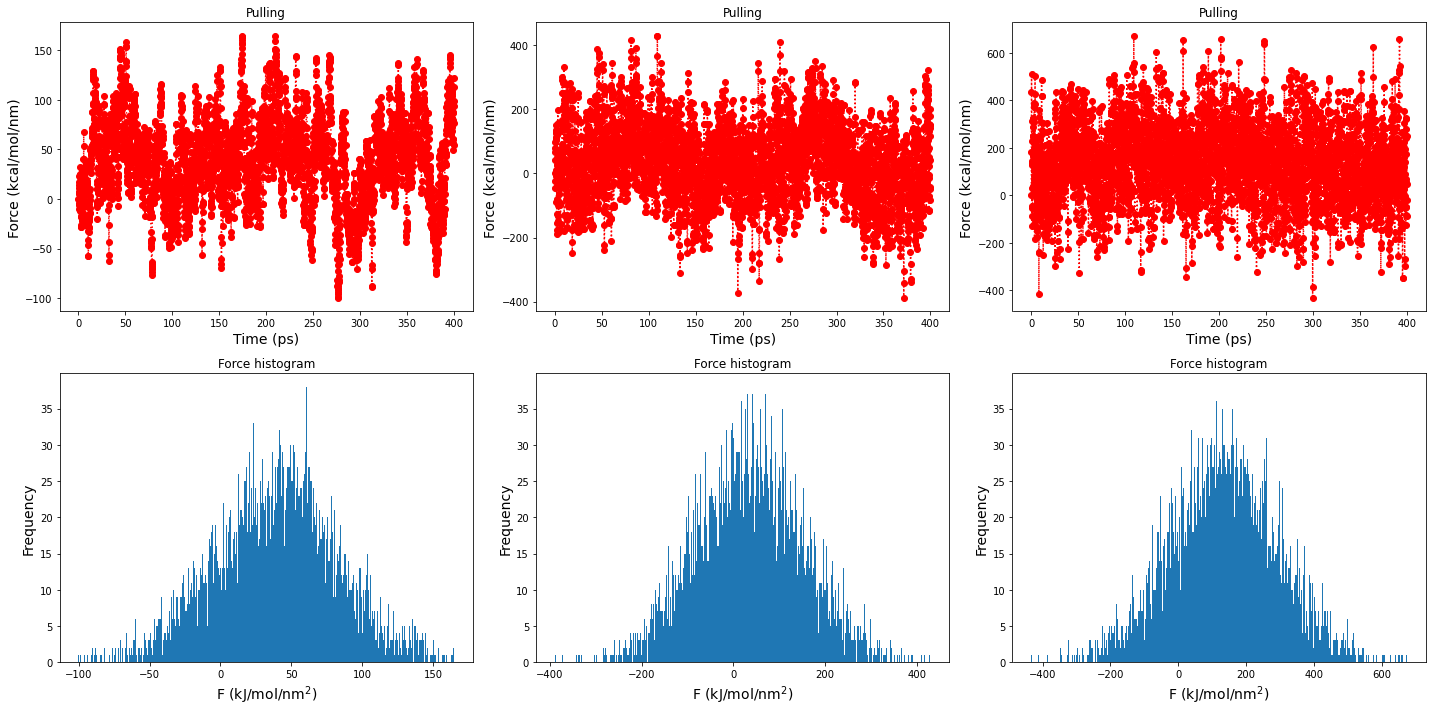

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
plt.figure(figsize=(20,10))
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff/Equil/')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 1)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

           
            plt.ylabel('Force (kcal/mol/nm)',fontsize=14)
            plt.xlabel('Time (ps)',fontsize=14)
            
            #plt.legend(loc='best')
            
            plt.title('Pulling')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(2, 3, 2)
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kcal/mol/nm)',fontsize=14)
            plt.xlabel('Time (ps)',fontsize=14)
            
            #plt.legend(loc='best')
            
            plt.title('Pulling')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_10000_eq')
with open('data.txt', 'w') as file:
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "g","y","c","m"])

for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            X=f[:,0]
            Y=f[:,1]
            plt.subplot(2, 3, 3)
            
            
            
            plt.plot(X,Y,':ro',label=name,color=next(colors))

            plt.ylabel('Force (kcal/mol/nm)',fontsize=14)
            plt.xlabel('Time (ps)',fontsize=14)
            
            #plt.legend(loc='best')
            
            plt.title('Pulling')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
            
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff/Equil/')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            X=f[:,0]
            Y=f[:,1]
            plt.subplot(2, 3, 4)
            plt.hist(Y, bins = 400, label=r'$\Delta$x,y')
            plt.ylabel('Frequency',fontsize=14)
            plt.xlabel('F (kJ/mol/nm$^2$)',fontsize=14)
            
            #plt.legend(loc='best')
            #plt.xlim(0, 30)
            #plt.ylim(0, 0.5)
             
            plt.title('Force histogram')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq')
with open('data.txt', 'w') as file:
    
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
       
            X=f[:,0]
            Y=f[:,1]
            plt.subplot(2, 3, 5)
            plt.hist(Y, bins = 400, label=r'$\Delta$x,y')
            plt.ylabel('Frequency',fontsize=14)
            plt.xlabel('F (kJ/mol/nm$^2$)',fontsize=14)
            
            #plt.legend(loc='best')
            #plt.xlim(0, 30)
            #plt.ylim(0, 0.5)
             
            plt.title('Force histogram')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_10000_eq')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])

for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)

            
            X=f[:,0]
            Y=f[:,1]
            plt.subplot(2, 3, 6)
            plt.hist(Y, bins = 400, label=r'$\Delta$x,y')
            plt.ylabel('Frequency',fontsize=14)
            plt.xlabel('F (kJ/mol/nm$^2$)',fontsize=14)
            
            #plt.legend(loc='best')
            #plt.xlim(0, 30)
            #plt.ylim(0, 0.5)
             
            plt.title('Force histogram')
            #plt.figure(2)
            #plt.hist(Y, bins = 40, label=r'$\Delta$x,y')
            #plt.ylabel('Frequency',fontsize=14)
            #plt.xlabel('$\Delta$z (nm) ',fontsize=14)
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 
  
       
 
plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_3wat/All.png',dpi=300,bbox_inches='tight',pad_inches=0.10)
plt.show()

A exp[-0.5((x-mu)/sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
27.993505962715673 135.15669950148055 155.24513781081833 0.16409417010623198


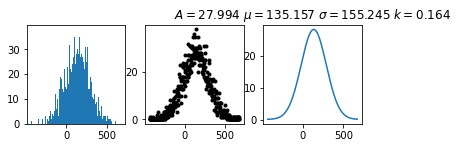

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq


os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_10000_eq')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])

for name in sorted(glob.glob('pull_z_29_pullf.xvg')):
        try: 
        #with open(name) as f:
        
            
            fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
            errfunc  = lambda p, x, y: (y - fitfunc(p, x))

            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)

            xdata=f[:,0]
            ydata=f[:,1]
            
            plt.subplot(2, 3, 1)              
            counts, binEdges=np.histogram(ydata, bins = 400)
            plt.hist(ydata, bins = 400)
            
            
            
            plt.subplot(2, 3, 2)
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            plt.scatter(bincenters,counts,c='k', marker='.')
 

            #binEdges, plt.digitize(ydata, binEdges)
            
            
            

            init  = [1.0, 0.5, 0.5, 0.5]

            out   = leastsq( errfunc, init, args=(bincenters, counts))
            c = out[0]
            
            print("A exp[-0.5((x-mu)/sigma)^2] + k ")
            print("Parent Coefficients:")
            print("1.000, 0.200, 0.300, 0.625")
            print("Fit Coefficients:")
            print(c[0],c[1],abs(c[2]),c[3])

            plt.subplot(2, 3, 3)
            #plot(xdata, fitfunc(c, xdata))
            #plot(xdata, ydata)
            plot(bincenters, fitfunc(c, bincenters))
            
            title(r'$A = %.3f\  \mu = %.3f\  \sigma = %.3f\ k = %.3f $' %(c[0],c[1],abs(c[2]),c[3]));

            show()
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

1
2
3
4


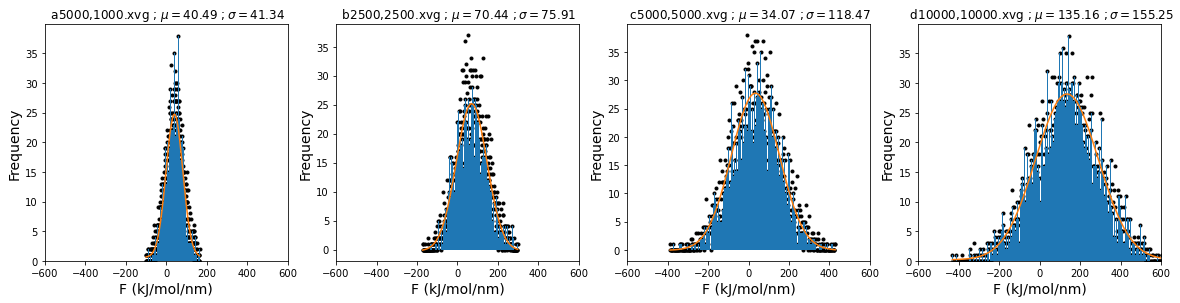

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq
plt.figure(figsize=(20,20))
count=1

# create subplots

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/Comparison')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
    

    fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
    errfunc  = lambda p, x, y: (y - fitfunc(p, x))

for name in sorted(glob.glob('*,*.xvg')):
        try: 
            print(count)
            plt.subplot(4, 4, count) 

            subplot_dim = (6, 6)

            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
            #print(name)
            #print(count)
            
            xdata=f[:,0]
            ydata=f[:,1]             

            counts, binEdges=np.histogram(ydata, bins = 400)
            plt.hist(ydata, bins = 400)
            plt.xlim(-600,600)
            
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            plt.scatter(bincenters,counts,c='k', marker='.',label='name')
 
            #binEdges, plt.digitize(ydata, binEdges)
            
            init  = [1.0, 0.5, 0.5, 0.5]

            out   = leastsq( errfunc, init, args=(bincenters, counts))
            c = out[0]
            
            #print("A exp[-0.5((x-mu)/sigma)^2] + k ")
            #print("Parent Coefficients:")
            #print("1.000, 0.200, 0.300, 0.625")
            #print("Fit Coefficients:")
            #print(c[0],c[1],abs(c[2]),c[3])
            
            plt.ylabel('Frequency',fontsize=14)
            plt.xlabel('F (kJ/mol/nm)',fontsize=14)
            plot(bincenters, fitfunc(c, bincenters))
            
            title(r' %s ; $\mu = %.2f\ ;  \sigma = %.2f\ $' %(name, c[1],abs(c[2])));

            count+=1
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

#plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/All.png',dpi=300,bbox_inches='tight',pad_inches=0.10)
plt.show()

1
2
3
4


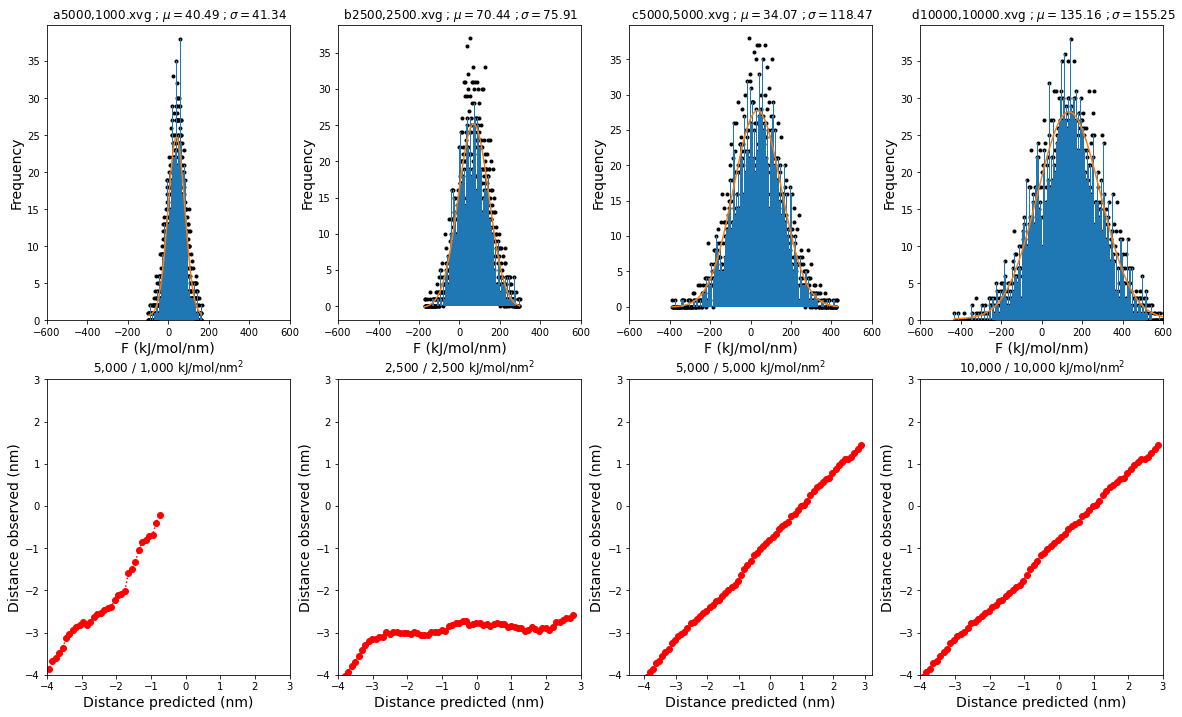

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq
plt.figure(figsize=(20,25))
count=1

# create subplots

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/Comparison')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
    

    fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
    errfunc  = lambda p, x, y: (y - fitfunc(p, x))

for name in sorted(glob.glob('*,*.xvg')):
        try: 
            print(count)
            plt.subplot(4, 4, count) 

            subplot_dim = (6, 6)

            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name)
            #print(name)
            #print(count)
            
            xdata=f[:,0]
            ydata=f[:,1]             

            counts, binEdges=np.histogram(ydata, bins = 400)
            plt.hist(ydata, bins = 400)
            plt.xlim(-600,600)
            
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            plt.scatter(bincenters,counts,c='k', marker='.',label='name')
 
            #binEdges, plt.digitize(ydata, binEdges)
            
            init  = [1.0, 0.5, 0.5, 0.5]

            out   = leastsq( errfunc, init, args=(bincenters, counts))
            c = out[0]
            
            #print("A exp[-0.5((x-mu)/sigma)^2] + k ")
            #print("Parent Coefficients:")
            #print("1.000, 0.200, 0.300, 0.625")
            #print("Fit Coefficients:")
            #print(c[0],c[1],abs(c[2]),c[3])
            
            plt.ylabel('Frequency',fontsize=14)
            plt.xlabel('F (kJ/mol/nm)',fontsize=14)
            plot(bincenters, fitfunc(c, bincenters))
            
            title(r' %s ; $\mu = %.2f\ ;  \sigma = %.2f\ $' %(name, c[1],abs(c[2])));

            count+=1
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

 
  
os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff/Equil')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('X_spring_const.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(4, 4, 5)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('Distance observed (nm)',fontsize=14)
            plt.xlabel('Distance predicted (nm)',fontsize=14)
            plt.title('5,000 / 1,000 kJ/mol/nm$^2$')
            plt.ylim(-4,3)
            plt.xlim(-4,3)

            #plt.ticklabel_format(axis='y', style='sci')
     
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
                

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_2500eq/Equil')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('X_spring_const.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(4, 4, 6)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('Distance observed (nm)',fontsize=14)
            plt.xlabel('Distance predicted (nm)',fontsize=14)
            plt.title('2,500 / 2,500 kJ/mol/nm$^2$')
            plt.ylim(-4,3)
            plt.xlim(-4,3)

            #plt.ticklabel_format(axis='y', style='sci')
     
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_5000eq')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('X_spring_const.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(4, 4, 7)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('Distance observed (nm)',fontsize=14)
            plt.xlabel('Distance predicted (nm)',fontsize=14)
            plt.title('5,000 / 5,000 kJ/mol/nm$^2$')
            plt.ylim(-4,3)
            #plt.ticklabel_format(axis='y', style='sci')
     
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise
            
            os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_10000_')
with open('data.txt', 'w') as file:
    
    path2 = os.getcwd()
    colors = itertools.cycle(["r", "b", "black","green","c","m","cyan","yellow"])
for name in sorted(glob.glob('X_spring_const.txt')):
        try: 
        #with open(name) as f:
        
            lines = open(name,'r')
            f = np.loadtxt(name)
            
            X=f[:,0]
            Y=f[:,1]
            
            plt.subplot(4, 4, 8)

            plt.plot(X, Y,':ro',label=name,color=next(colors))
            plt.ylabel('Distance observed (nm)',fontsize=14)
            plt.xlabel('Distance predicted (nm)',fontsize=14)
            plt.title('10,000 / 10,000 kJ/mol/nm$^2$')
            plt.ylim(-4,3)
            plt.xlim(-4,3)

            #plt.ticklabel_format(axis='y', style='sci')
     
            
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise

            
#plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/All_new.png',dpi=300,bbox_inches='tight',pad_inches=0.20)
plt.show()
            

1


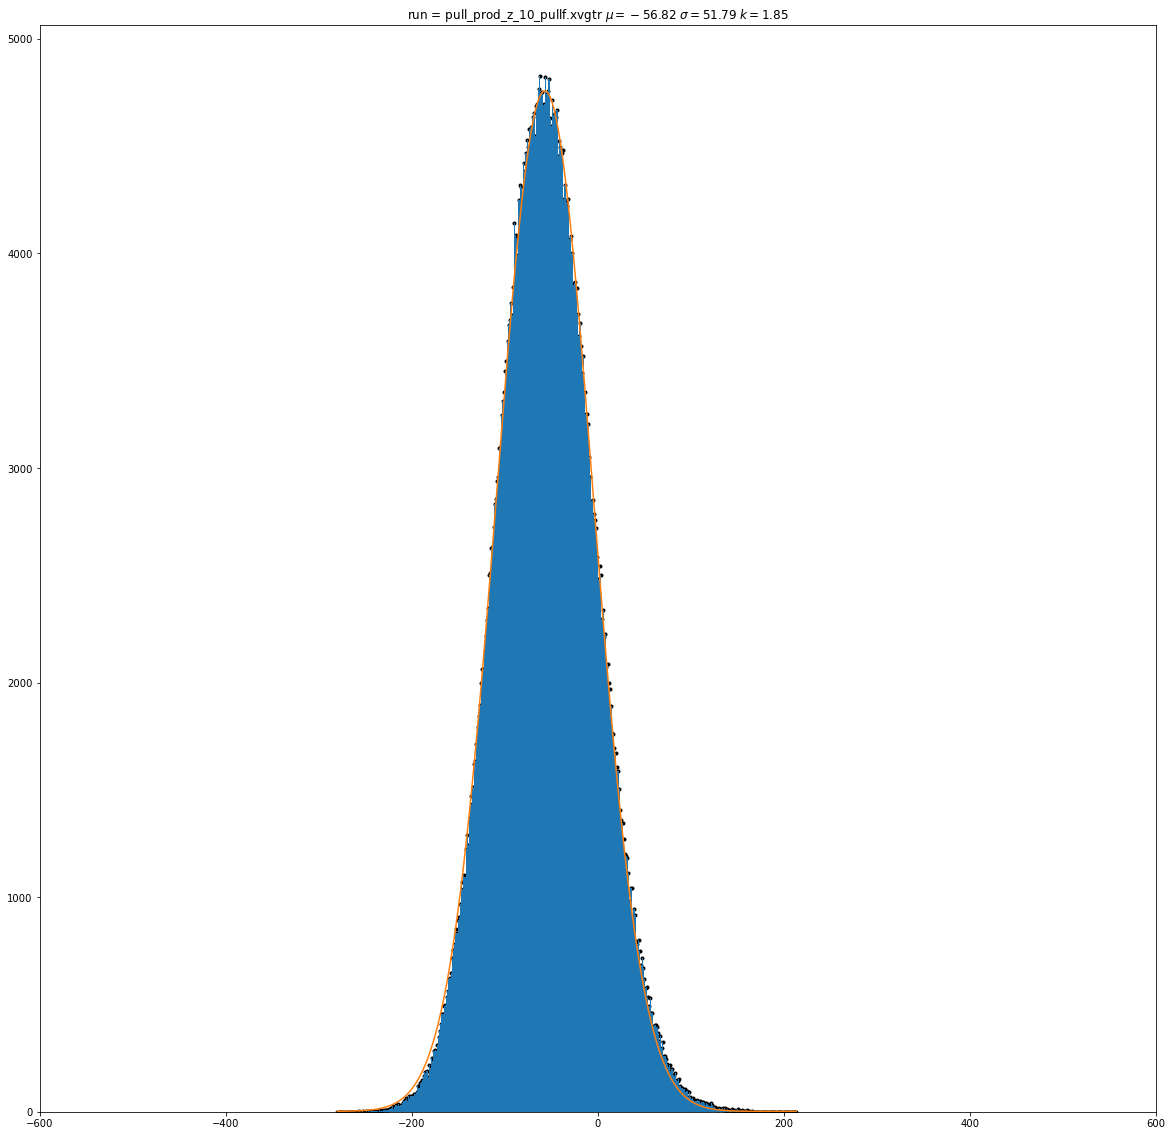

2


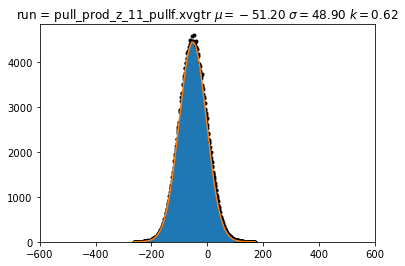

3


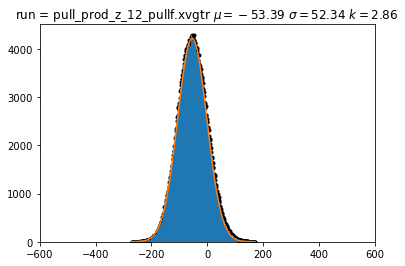

4


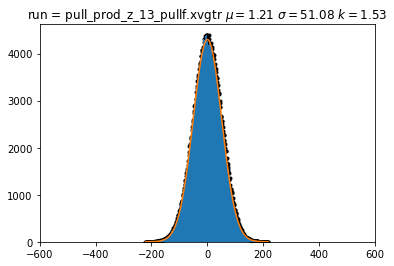

5


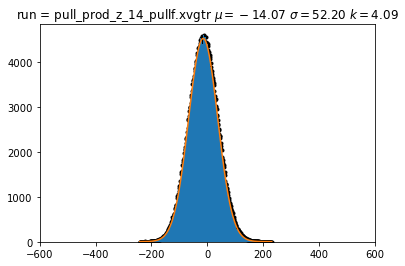

6


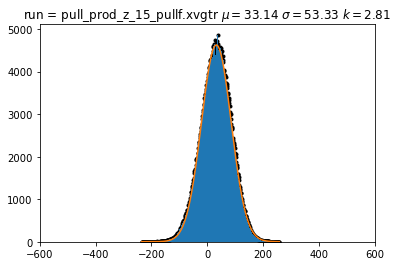

7


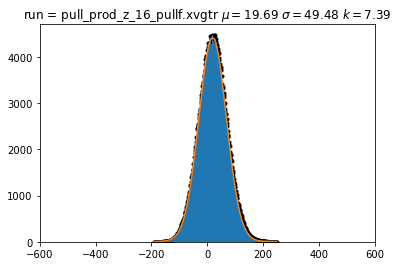

8


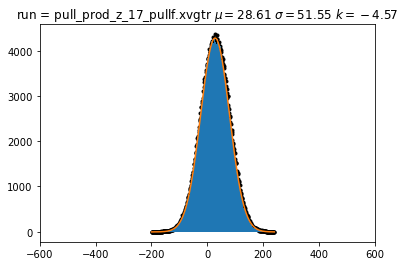

9


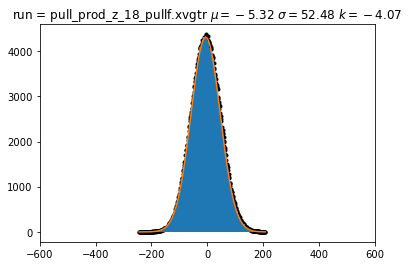

10


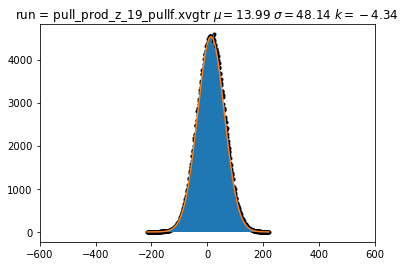

11


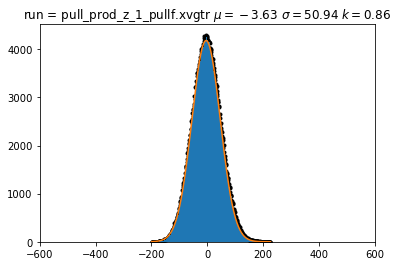

12


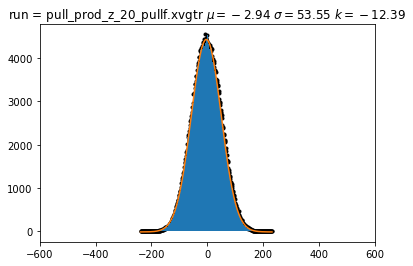

13


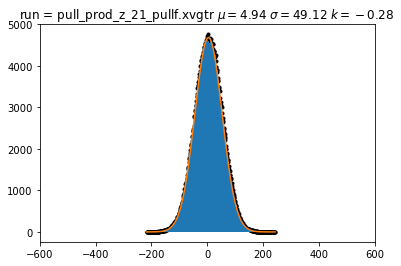

14


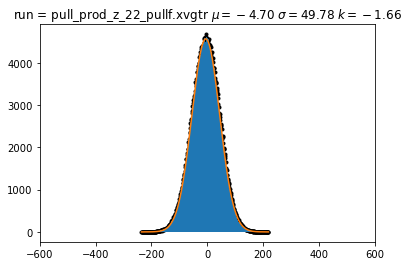

15


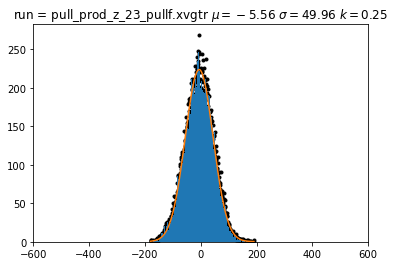

16


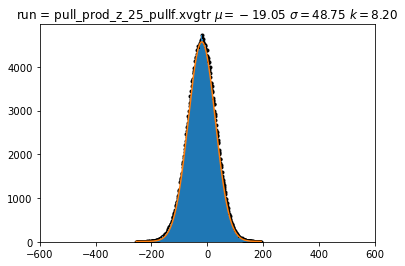

17


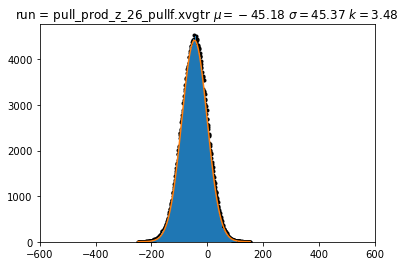

18


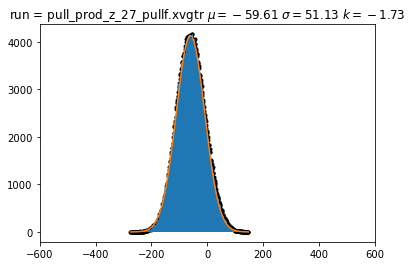

19


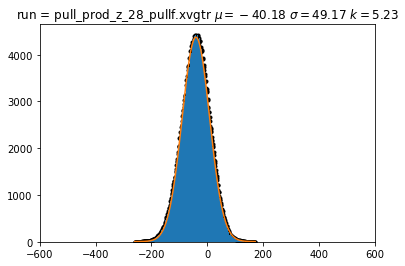

20


StopIteration: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq
plt.figure(figsize=(20,20))
count=1

# create subplots

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All_test')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
    

    fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
    errfunc  = lambda p, x, y: (y - fitfunc(p, x))

for name in sorted(glob.glob('*pullf.xvg')):
        try: 
            print(count)
            #plt.subplot(1, 1, count) 

            subplot_dim = (6, 6)

            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name, skiprows=500000)
            #print(name)
            #print(count)
            
            xdata=f[:,0]
            ydata=f[:,1]             

            counts, binEdges=np.histogram(ydata, bins = 400)
            plt.hist(ydata, bins = 400)
            plt.xlim(-600,600)
            
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            plt.scatter(bincenters,counts,c='k', marker='.',label='name')
 
            #binEdges, plt.digitize(ydata, binEdges)
            
            init  = [1.0, 0.5, 0.5, 0.5]

            out   = leastsq( errfunc, init, args=(bincenters, counts))
            c = out[0]
            
            #print("A exp[-0.5((x-mu)/sigma)^2] + k ")
            #print("Parent Coefficients:")
            #print("1.000, 0.200, 0.300, 0.625")
            #print("Fit Coefficients:")
            #print(c[0],c[1],abs(c[2]),c[3])
             
            plot(bincenters, fitfunc(c, bincenters))
            
            title(r'run = %s $ \mu = %.2f\  \sigma = %.2f\ k = %.2f $' %(name, c[1],abs(c[2]),c[3]));
            
            count+=1
            plt.show()
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

#plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_Symm/Caff_Sym_0.2/All_test.png',dpi=300,bbox_inches='tight',pad_inches=0.20)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob 
import errno 
import itertools
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq
plt.figure(figsize=(20,20))
count=1

# create subplots

os.chdir('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test2/Average')
with open('data.txt', 'w') as file:
    path = './*pullf.xvg' 
    path2 = os.getcwd()
    files = glob.glob(path)
    colors = itertools.cycle(["r", "b", "g","y","c","m"])
    
def key_func(x):
        return os.path.split(x)[-1]

for name in sorted(glob.glob('average_prod_z_*_pullf.xvg'), key=key_func):
        try: 
            print(count)
            #plt.subplot(1, 1, count) 

            subplot_dim = (6, 6)

            lines = open(name,'r')
            #f = lines.readlines()[18:]
            f = np.loadtxt(name, skiprows=0)
            #print(name)
            #print(count)
            
            X=f[:,0]
            Y=f[:,1]             

            plt.plot(X,Y,':ro',label=name,color=next(colors))
            plt.ylabel('Average force (kJ/mol/nm)',fontsize=14)
            plt.xlabel('Time (ns)',fontsize=14)
            plt.ylim(-120, 120)
            #plt.errorbar(X,Y, yerr=0, label='both limits (default)')
            plt.title('Force')
            plt.legend(loc='upper left')
            plt.minorticks_on()
             
            
            count+=1
            plt.show()
        except IOError as exc: 
            if exc.errno != errno.EISDIR: 
                raise 

#plt.tight_layout()
plt.savefig('/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test2/Average/Force_avg.png',dpi=300,bbox_inches='tight',pad_inches=0.20)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/chrisjorg/Documents/Postdoc/Georgetown/Double_bilayer_Sandwich/Z_LPP/LPP_Caff_DPG_5000eq_0.2/All_test2/Average'

<Figure size 2000x2000 with 0 Axes>